In [19]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'  # or any {'0', '1', '2'}

# controls
create_model = 1
show_some_digits = 1
make_some_predictions = 1
scale_dat = 0

# params
nrows_to_show = 8
ncols_to_show = 10
model_name = 'neural.model'

# load input variables
XX = np.load('XX2.npy')
yy = np.load('yy2.npy')
print(XX.shape)
n_rows = XX.shape[0]
n_cols = XX.shape[1]

(1042, 100)


In [20]:
# split data set into training and test data
x_train, x_test, y_train, y_test = train_test_split(XX, yy, test_size=0.3, random_state=1)
# x_train, x_test, y_train, y_test = train_test_split(XX, yy, test_size=0.1, random_state=None)

# code left over from when spikes were represented as .png images
if scale_dat:
    x_train = x_train / 100
    x_test = x_test / 100

print(f'\nx_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}\n')
print(f'x_train\n{x_train}\n')
print(f'y_train\n{y_train}')


x_train shape = (729, 100)
x_test shape = (313, 100)

x_train
[[ 0.31858529  0.30087856  0.28764209 ...  0.09861273  0.06565826
   0.02738623]
 [ 0.35489921  0.34839215  0.36443726 ...  0.02134818 -0.00296401
  -0.02204367]
 [ 0.4603059   0.48247268  0.47849643 ... -0.05043081 -0.04555989
  -0.03017606]
 ...
 [ 0.3693788   0.37105676  0.38938995 ...  0.11301888  0.1454547
   0.14864811]
 [ 0.37689413  0.36471277  0.37250383 ...  0.06762782  0.0426244
   0.00207573]
 [ 0.39855181  0.3406824   0.29304246 ...  0.04303473  0.04055295
   0.06482331]]

y_train
[0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0
 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0
 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 

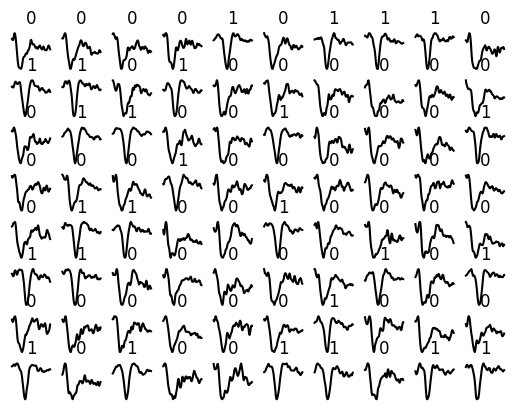

In [21]:
# show some of the training data
if show_some_digits:
    plt.figure()
    for index in range(nrows_to_show*ncols_to_show):
        dig_test_x = x_train[index]
        dig_class_true = int(y_train[index])
        #plot
        plt.subplot(nrows_to_show, ncols_to_show, index+1)
        plt.plot(dig_test_x, 'k')        
        plt.title(dig_class_true)
        plt.axis('off')
    plt.show()
    plt.close()

In [22]:
# Create model
if create_model:
    print('1) Generating model...')
    model = tf.keras.models.Sequential()
    # Add input layer
    model.add(tf.keras.layers.InputLayer(input_shape=(n_cols, ), name='input_layer'))
    # Add 2 hidden layers
    model.add(tf.keras.layers.Dense(units=n_cols, activation=tf.nn.relu))  # 1st hidden layer with "dense" connections to input layer
    model.add(tf.keras.layers.Dense(units=n_cols, activation=tf.nn.relu))  # 2nd hidden layer with "dense" connections to input layer
    # Add output layer
    model.add(tf.keras.layers.Dense(units=2, activation=tf.nn.softmax)) # output laayer w/ 2 neurons that are scaled so their sum adds up to 1
    
    # Compile model
    print('\n2) Compiling model...')
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train model
    print('\n3) Training model...')
    model.fit(x_train, y_train, epochs=3)

    # Evaluate model
    print('\n4) Evaluating model...')
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f'\nloss = {loss}')
    print(f'accuracy = {accuracy}')

    # Save model    
    print(f'Saving model..."{model_name}"')
    model.save(model_name, save_format="h5")
else:
    print(f'\nLoading model..."{model_name}"')
    model = tf.keras.models.load_model(model_name)

# Check model architecture
model.summary()


1) Generating model...

2) Compiling model...

3) Training model...
Epoch 1/3
23/23 [==============================] - 0s 2ms/step - loss: 0.3072 - accuracy: 0.9369
Epoch 2/3
23/23 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 0.9986
Epoch 3/3
23/23 [==============================] - 0s 1ms/step - loss: 0.0064 - accuracy: 0.9986

4) Evaluating model...
10/10 [==============================] - 0s 1ms/step - loss: 0.0057 - accuracy: 0.9968

loss = 0.005672397557646036
accuracy = 0.9968051314353943
Saving model..."neural.model"
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)      

1/1 [==============================] - 0s 14ms/step


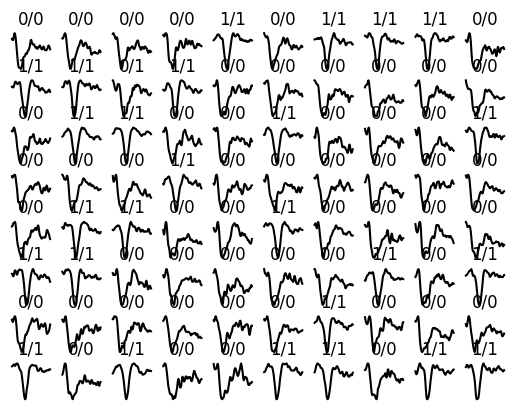

In [23]:
# plot spks showing true and predicted directions
if make_some_predictions:
    plt.figure()
    for index in range(nrows_to_show*ncols_to_show): 
        dig_test_x = x_train[index]        
        dig_class_true = int(y_train[index])
        guesses = model.predict(np.array([dig_test_x]))
        best_guess = int(np.argmax(guesses))
        # plot
        plt.subplot(nrows_to_show, ncols_to_show, index+1)
        plt.plot(dig_test_x, 'k')        
        plt.title(f'{dig_class_true}/{best_guess}')
        plt.axis('off')
    plt.show()
    plt.close()

In [24]:
# Make predictions on test data
#xxs = XX #x_test
#yys = yy #y_test
xxs = x_test
yys = y_test
y_pred = model.predict(xxs)
label_pred = np.argmax(y_pred, axis=1)

# generate a confusion matrix
cm = confusion_matrix(yys, label_pred)
print(f'\nConfusion matrix:\n{cm}')

# # Show confusion matrix in a separate window
# plt.matshow(cm)
# plt.title('Confusion matrix')
# plt.colorbar()
# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# plt.show()


10/10 [==============================] - 0s 937us/step

Confusion matrix:
[[161   1]
 [  0 151]]
